In [2]:
import pandas as pd
import gc
import sys
sys.path.append("/home/apis/nykaa")
from pas.v2.utils import Utils

In [3]:
df = pd.read_csv('/home/ubuntu/data/cab/cab_7_jan.csv')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24869502 entries, 0 to 24869501
Data columns (total 7 columns):
order_id        object
customer_id     int64
product_id      float64
sku             object
product_type    object
product_name    object
created_at      object
dtypes: float64(1), int64(1), object(5)
memory usage: 9.3 GB


# Making dict of product to name

In [ ]:
products_df = df.filter(['product_id', 'product_name'])
products_df.head()

In [ ]:
productid2name = dict(zip(products_df.product_id, products_df.product_name))

In [ ]:
len(productid2name)

In [ ]:
del products_df

Calculating unique customers and product

In [5]:
unique_products = list(df['product_id'].unique())
unique_customers = list(df['customer_id'].unique())
len(unique_products), len(unique_customers)

(72583, 2255480)

In [6]:
df.head()

,order_id,customer_id,product_id,sku,product_type,product_name,created_at
0,505181137,613295,188915.0,8901314308009,SIMPLE,Colgate Bubble Fruit Flavour Minions Toothpast...,2018-06-01 00:04:19
1,505181137,613295,13368.0,8906009450414,SIMPLE,Biotique Bio Kelp fresh growth Protein Shampoo,2018-06-01 00:04:19
2,505181137,613295,39968.0,8906009452616,SIMPLE,Biotique Bio Honey Gel Refreshing Foaming Face...,2018-06-01 00:04:19
3,505181137,613295,209020.0,8901030665066,SIMPLE,Dove Cream Beauty Bathing Soap (Buy 4 Get 1),2018-06-01 00:04:19
4,505181137,613295,213461.0,8901314306500,SIMPLE,Colgate Cibaca Vedshakti Toothpaste,2018-06-01 00:04:19


Only need customer_id and product_id

In [7]:
df = df.filter(['customer_id', 'product_id'])

In [8]:
df['bought_count'] = 1
df = df.groupby(['customer_id', 'product_id']).agg({'bought_count': 'sum'}).reset_index()
len(df)

18355848

In [9]:
df.head()

,customer_id,product_id,bought_count
0,20,255372.0,1
1,20,294928.0,1
2,20,328566.0,1
3,32,71383.0,1
4,32,267319.0,1


In [10]:
df.drop(['bought_count'], axis=1, inplace=True)
len(df)

18355848

In [11]:
df.head()

,customer_id,product_id
0,20,255372.0
1,20,294928.0
2,20,328566.0
3,32,71383.0
4,32,267319.0


Computing product to customers count, will be used in computing customers union

In [12]:
from joblib import Parallel, delayed

product_to_customers_count = {}
def compute_product_to_customers_dict(product_id):
    product_to_customers_count[product_id] = len(df[df['product_id'] == product_id])

Parallel(n_jobs=10, verbose=1, pre_dispatch='1.5*n_jobs', backend="threading")(delayed(compute_product_to_customers_dict)(product_id) for product_id in unique_products)

[Parallel(n_jobs=10)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 185 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 435 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 785 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 1235 tasks      | elapsed:    4.5s
[Parallel(n_jobs=10)]: Done 1785 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 2435 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 3185 tasks      | elapsed:   11.2s
[Parallel(n_jobs=10)]: Done 4035 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done 4985 tasks      | elapsed:   17.2s
[Parallel(n_jobs=10)]: Done 6035 tasks      | elapsed:   20.7s
[Parallel(n_jobs=10)]: Done 7185 tasks      | elapsed:   24.4s
[Parallel(n_jobs=10)]: Done 8435 tasks      | elapsed:   28.5s
[Parallel(n_jobs=10)]: Done 9785 tasks      | elapsed:   32.8s
[Parallel(n_jobs=10)]: Done 11235 tasks      | elapsed:   37.4s
[Parallel(n_jobs=10)]: Done 12785 tasks      | elapsed:   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [59]:
product_to_customers_count[245655]

3891

In [13]:
df = df.sort_values(['customer_id'])

In [21]:
product_to_customers_count[2276]

2080

In [22]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355848 entries, 0 to 18355847
Data columns (total 2 columns):
customer_id    int64
product_id     float64
dtypes: float64(1), int64(1)
memory usage: 420.1 MB


In [23]:
df_len = len(df)
df_len

18355848

# Processing data without batches

Two products will have similarity between them if atleast one user has bought both products, other product combinations we can leave out.
Here, computing self join of dataframe on customer_id, so that we can get all the product combinations.

In [ ]:
merged_df = pd.merge(df, df, on="customer_id", how="inner") 
len(merged_df)

In [ ]:
merged_df.head()

In [ ]:
filtered_df = merged_df[merged_df['product_id_x'] < merged_df['product_id_y']].reset_index().drop('index', axis=1)
len(filtered_df)

In [ ]:
filtered_df.head()

In [ ]:
filtered_df = filtered_df.drop('customer_id', axis=1)

In [ ]:
filtered_df['customers_count'] = 1

In [ ]:
filtered_grouped_df = filtered_df.groupby(['product_id_x', 'product_id_y']).agg({'customers_count': 'count'}).reset_index()

In [ ]:
filtered_grouped_df.head()

In [ ]:
len(filtered_grouped_df)

In [ ]:
final_df = filtered_grouped_df

# Processing data in batches

In [24]:
BATCH_SIZE = 5000000
offset = 0
final_df = pd.DataFrame([])
while offset < df_len:
    last_idx = offset + BATCH_SIZE if offset + BATCH_SIZE < df_len else df_len
    print("Started processing data from offset %d till %d" % (offset, last_idx-1))
    _df = df[offset:last_idx]
    _df = pd.merge(_df, _df, on="customer_id", how="inner") 
    _df = _df[_df['product_id_x'] < _df['product_id_y']].reset_index(drop=True)
    _df = _df.drop('customer_id', axis=1)
    _df['customers_count'] = 1
    _df = _df.groupby(['product_id_x', 'product_id_y']).agg({'customers_count': 'sum'}).reset_index()
    final_df = final_df.append(_df)
    final_df = final_df.groupby(['product_id_x', 'product_id_y']).agg({'customers_count': 'sum'}).reset_index()
    offset = last_idx

Started processing data from offset 0 till 4999999
Started processing data from offset 5000000 till 9999999
Started processing data from offset 10000000 till 14999999
Started processing data from offset 15000000 till 18355847


In [25]:
len(final_df)

42744512

In [26]:
final_df.head()

,product_id_x,product_id_y,customers_count
0,250.0,254.0,22
1,250.0,261.0,3
2,250.0,368.0,3
3,250.0,381.0,2
4,250.0,479.0,1


In [27]:
final_df.rename(index=str, columns={"customers_count": "customers_intersection"}, inplace=True)

# Using Histogram for visualizing products that are removed from recommendations table when using different threshold

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

data = {}
for i in range(1, 50, 1):
    _df = final_df[final_df['customers_intersection'] >= i]
    _unique_products = set(list(_df['product_id_x'].unique()) + list(_df['product_id_y'].unique()))
    data[i] = len(_unique_products)

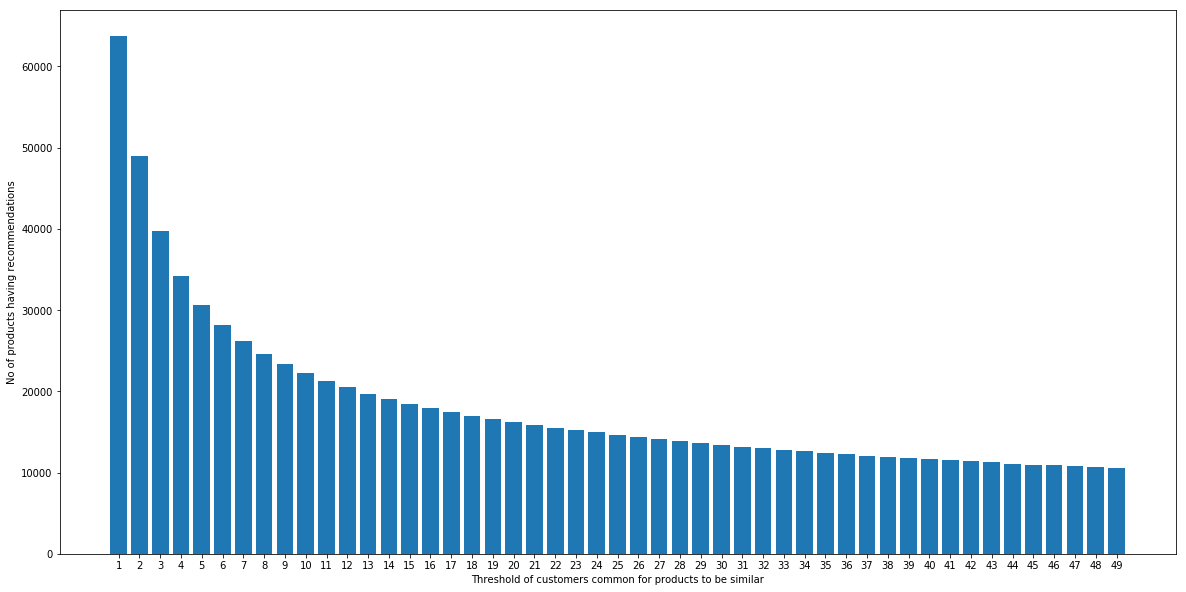

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel('Threshold of customers common for products to be similar')
plt.ylabel('No of products having recommendations')
plt.bar(range(len(data)), data.values(), align='center')
plt.xticks(range(len(data)), list(data.keys()))

plt.show()

Using 2 as the threshold of customer intersection

In [28]:
final_df = final_df[final_df['customers_intersection'] >= 2]

In [29]:
len(final_df)

16539311

In [ ]:
final_df[final_df['product_id_x'] == 250]

In [ ]:
filtered_grouped_df[filtered_grouped_df['product_id_x'] == 250]

# Parallelizing DataFrame operations

In [30]:
from multiprocessing import Pool
import numpy as np

def parallelize_dataframe(df, func, num_partitions, num_cores):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# Removing product bias

Computing union of customers for a row of two products

In [31]:
def compute_customer_union(data):
    data['customers_union'] = data.apply(lambda row: product_to_customers_count[row['product_id_x']] + product_to_customers_count[row['product_id_y']] - row['customers_intersection'], axis=1)
    return data
    
final_df = parallelize_dataframe(final_df, compute_customer_union, 40, 16)

Computing similarity of products by removing bias in three different ways

In [32]:
import math

def compute_similarity(data):
    data['similarity'] = data.apply(lambda row: row['customers_intersection']/row['customers_union'], axis=1)
    
    data['log_similarity_y_x'] = data.apply(lambda row: row['customers_intersection']/product_to_customers_count[row['product_id_x']]/math.log(product_to_customers_count[row['product_id_y']]), axis=1)
    data['log_similarity_x_y'] = data.apply(lambda row: row['customers_intersection']/product_to_customers_count[row['product_id_y']]/math.log(product_to_customers_count[row['product_id_x']]), axis=1)
    
    data['sqrt_similarity_y_x'] = data.apply(lambda row: row['customers_intersection']/product_to_customers_count[row['product_id_x']]/math.sqrt(product_to_customers_count[row['product_id_y']]), axis=1) 
    data['sqrt_similarity_x_y'] = data.apply(lambda row: row['customers_intersection']/product_to_customers_count[row['product_id_y']]/math.sqrt(product_to_customers_count[row['product_id_x']]), axis=1)     
    
    data['log_similarity'] = data.apply(lambda row: row['customers_intersection']/math.log(row['customers_union']), axis=1) 
    data['sqrt_similarity'] = data.apply(lambda row: row['customers_intersection']/math.sqrt(row['customers_union']), axis=1)
    return data
    
final_df = parallelize_dataframe(final_df, compute_similarity, 40, 16)

In [33]:
len(final_df)

16539311

In [34]:
final_df.head()

,product_id_x,product_id_y,customers_intersection,customers_union,similarity,log_similarity_y_x,log_similarity_x_y,sqrt_similarity_y_x,sqrt_similarity_x_y,log_similarity,sqrt_similarity
0,250.0,254.0,22,13788.0,0.001596,0.010229,0.000299,0.000835,0.000108,2.308123,0.187358
1,250.0,261.0,3,1699.0,0.001766,0.001819,0.000375,0.000346,0.000135,0.403345,0.072782
2,250.0,368.0,3,5631.0,0.000533,0.001544,0.000102,0.000181,0.000037,0.347381,0.039979
3,250.0,381.0,2,1750.0,0.001143,0.001207,0.000242,0.000227,0.000087,0.267832,0.047809
6,250.0,806.0,17,27763.0,0.000612,0.007357,0.000114,0.000453,0.000041,1.661542,0.102027


Again computing the unique products

In [35]:
unique_products = set(list(final_df['product_id_x'].unique()) + list(final_df['product_id_y'].unique()))

In [36]:
len(unique_products)

45644

# Adding is_luxe field to data

Extracting out luxe products from ES

In [ ]:
import sys
sys.path.append("/nykaa/api")
from pas.v2.utils import Utils

unique_product_ids = list(map(lambda x: int(x), list(df['product_id'].unique())))
es_query = {
    "query": {
        "bool": {
            "must": [
                {"term": {"is_luxe": True}},
                {"terms": {"product_id.keyword": unique_product_ids}}
            ]
        }
    },
    "_source": ["product_id"]
}

es_conn = DiscUtils.esConn()
scroll_id = None
luxe_products = []
while True:
    if not scroll_id:
        response = es_conn.search(index='livecore', body=es_query, scroll='25m')
    else:
        response = es_conn.scroll(scroll_id=scroll_id, scroll='25m')
        
    if not response['hits']['hits']:
        break
      
    scroll_id = response['_scroll_id']
    luxe_products += [int(hit['_source']['product_id']) for hit in response['hits']['hits']]
    
luxe_products_dict = {int(product_id): True for product_id in luxe_products}

Extracting out luxe products from json file

In [37]:
import json

luxe_products = DiscUtils.scrollESForResults()['luxe_products']
luxe_products_dict = {p:True for p in luxe_products}

In [38]:
final_df['is_luxe_x'] = final_df['product_id_x'].apply(lambda x: luxe_products_dict.get(int(x), False))
final_df['is_luxe_y'] = final_df['product_id_y'].apply(lambda x: luxe_products_dict.get(int(x), False))

In [39]:
final_df.head()

,product_id_x,product_id_y,customers_intersection,customers_union,similarity,log_similarity_y_x,log_similarity_x_y,sqrt_similarity_y_x,sqrt_similarity_x_y,log_similarity,sqrt_similarity,is_luxe_x,is_luxe_y
0,250.0,254.0,22,13788.0,0.001596,0.010229,0.000299,0.000835,0.000108,2.308123,0.187358,False,False
1,250.0,261.0,3,1699.0,0.001766,0.001819,0.000375,0.000346,0.000135,0.403345,0.072782,False,False
2,250.0,368.0,3,5631.0,0.000533,0.001544,0.000102,0.000181,0.000037,0.347381,0.039979,False,False
3,250.0,381.0,2,1750.0,0.001143,0.001207,0.000242,0.000227,0.000087,0.267832,0.047809,False,False
6,250.0,806.0,17,27763.0,0.000612,0.007357,0.000114,0.000453,0.000041,1.661542,0.102027,False,False


In [53]:
??df.sort_values

In [57]:
final_df[(final_df.product_id_x==262509) & (final_df.product_id_y==262515)]

,product_id_x,product_id_y,customers_intersection,customers_union,similarity,log_similarity_y_x,log_similarity_x_y,sqrt_similarity_y_x,sqrt_similarity_x_y,log_similarity,sqrt_similarity,is_luxe_x,is_luxe_y
39176221,262509.0,262515.0,57,2329.0,0.024474,0.006159,0.007498,0.001319,0.001479,7.351809,1.181109,False,False


In [55]:
final_df[(final_df.product_id_x==303851) | (final_df.product_id_y==303851)].sort_values(['similarity'], ascending=False)

,product_id_x,product_id_y,customers_intersection,customers_union,similarity,log_similarity_y_x,log_similarity_x_y,sqrt_similarity_y_x,sqrt_similarity_x_y,log_similarity,sqrt_similarity,is_luxe_x,is_luxe_y
41351528,303851.0,333577.0,3528,64364.0,0.054813,0.006581,0.035534,0.000630,0.001609,318.632704,13.906155,False,False
23515682,71406.0,303851.0,7319,134833.0,0.054282,0.008000,0.010976,0.000362,0.000431,619.635009,19.932127,False,False
22087140,61421.0,303851.0,6980,128667.0,0.054249,0.008276,0.010543,0.000375,0.000428,593.286028,19.459059,False,False
41351526,303851.0,333575.0,3432,64804.0,0.052960,0.006376,0.033300,0.000602,0.001508,309.771822,13.481753,False,False
28699354,116489.0,303851.0,3825,79944.0,0.047846,0.013977,0.006420,0.000633,0.000412,338.822954,13.528153,False,False
41351523,303851.0,333572.0,2819,63552.0,0.044357,0.005367,0.034137,0.000552,0.001545,254.891361,11.182283,False,False
28147809,111777.0,303851.0,3542,90418.0,0.039174,0.009186,0.005750,0.000416,0.000321,310.369641,11.779344,False,False
28470137,114009.0,303851.0,3149,84506.0,0.037264,0.009955,0.005211,0.000451,0.000315,277.577540,10.832505,False,False
20512835,40862.0,303851.0,3578,96528.0,0.037067,0.007897,0.005721,0.000358,0.000299,311.737961,11.516319,False,False
1298735,2374.0,303851.0,3151,87022.0,0.036209,0.009160,0.005172,0.000415,0.000303,277.037384,10.681540,False,False


# Getting Recommendations

Function for computing recommendations

In [ ]:
def get_recommendations(product_id, recommendations_cnt=10, with_name=True, similarity_type='direct'):
    if luxe_products_dict.get(product_id):
        if similarity_type == 'coccurence_log':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == True)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == True))].sort_values(['log_similarity'], ascending=[0])
        elif similarity_type == 'coccurence_sqrt':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == True)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == True))].sort_values(['sqrt_similarity'], ascending=[0])
        elif similarity_type == 'coccurence_direct':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == True)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == True))].sort_values(['similarity'], ascending=[0])
        else:
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == True)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == True))].sort_values(['customers_intersection'], ascending=[0])
    else:
        if similarity_type == 'coccurence_log':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == False)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == False)].sort_values(['log_similarity'], ascending=[0])
        elif similarity_type == 'coccurence_sqrt':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == False)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == False)].sort_values(['sqrt_similarity'], ascending=[0])
        elif similarity_type == 'coccurence_direct':
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == False)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == False)].sort_values(['similarity'], ascending=[0])
        else:
            _df = final_df[((final_df['product_id_x'] == product_id) & (final_df['is_luxe_y'] == False)) | ((final_df['product_id_y'] == product_id) & (final_df['is_luxe_x'] == False)].sort_values(['customers_intersection'], ascending=[0])

    rows = _df.values.tolist()
    product_similarity = []
    for row in rows:
        if row[0] == product_id:
            product_similarity.append((row[1], row[4]))
        elif row[1] == product_id:
            product_similarity.append((row[0], row[4]))
        else:
            raise Exception()
    if with_name:
        return [(_s[0], productid2name[_s[0]], _s[1]) for _s in product_similarity[:recommendations_cnt]]
    else:
        return [_s[0] for _s in product_similarity[:recommendations_cnt]]

In [ ]:
product_id = 15246
print("Product Name: %s" % productid2name[product_id])
print(get_recommendations(product_id, 20, True))
print(get_recommendations(product_id, 20, True, 'log'))
print(get_recommendations(product_id, 20, True, 'sqrt'))

In [ ]:
final_df.to_csv('collaborative_item_similarity.csv', encoding='utf-8', index=False)

# Function for adding rows into db

In [40]:
def add_recommendations_in_mysql(db, cursor, table, rows):
    values_str = ", ".join(["(%s, %s, %s, %s, %s)" for i in range(len(rows))])
    values = tuple([_i for row in rows for _i in row])
    insert_recommendations_query = """ INSERT INTO %s(entity_id, entity_type, recommendation_type, algo, recommended_products_json)
            VALUES %s ON DUPLICATE KEY UPDATE recommended_products_json=VALUES(recommended_products_json)
    """ % (table, values_str)
    values = tuple([str(_i) for row in rows for _i in row])
    cursor.execute(insert_recommendations_query, values)
    db.commit()

# Serial addition of recommendations to Mysql DB using the recommendation function

In [ ]:
pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()
algo = 'coccurence'
create_recommendations_table_query = """ CREATE TABLE IF NOT EXISTS recommendations (
                            entity_id INT UNSIGNED NOT NULL, 
                            entity_type VARCHAR(50),
                            recommendation_type VARCHAR(50),
                            algo VARCHAR(50),
                            recommended_products_json JSON,
                            PRIMARY KEY (entity_id, entity_type, recommendation_type, algo)
                            )
"""
cursor.execute(create_recommendations_table_query)
rows = []
for algo in ['coccurence_simple', 'coccurence_direct', 'coccurence_log', 'coccurence_sqrt']:
    for product_id in unique_products:
        recommendations = get_recommendations(product_id, 10, False, algo)
        if not recommendations:
            continue
        recommendations_str = str(recommendations)
        rows.append((product_id, 'product', 'bought', algo, recommendations_str))
        if len(rows) == 1000:
            values_str = ", ".join(["(%s, %s, %s, %s, %s)" for i in range(len(rows))])
            values = tuple([_i for row in rows for _i in row])
            insert_recommendations_query = """ INSERT INTO recommendations(entity_id, entity_type, recommendation_type, algo, recommended_products_json)
                VALUES %s ON DUPLICATE KEY UPDATE recommended_products_json=VALUES(recommended_products_json);
            """ % values_str
            values = tuple([str(_i) for row in rows for _i in row])
            cursor.execute(insert_recommendations_query, values)
            pasdb.commit()
            rows = []
        
values_str = ", ".join(["(%s, %s, %s, %s, %s)" for i in range(len(rows))])
values = tuple([str(_i) for row in rows for _i in row])
insert_recommendations_query = """ INSERT INTO recommendations(entity_id, entity_type, recommendation_type, algo, recommended_products_json)
            VALUES %s ON DUPLICATE KEY UPDATE recommended_products_json=VALUES(recommended_products_json);
""" % values_str
values = tuple([_i for row in rows for _i in row])
cursor.execute(insert_recommendations_query, values)
pasdb.commit()

# Parallel addition of recommendations to MySQL DB using recommendation function

In [ ]:
unique_products = list(df['product_id'].unique())
unique_customers = list(df['customer_id'].unique())
len(unique_products), len(unique_customers)

Adding recommendations into mysql

In [ ]:
from joblib import Parallel, delayed

pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()

create_recommendations_table_query = """ CREATE TABLE IF NOT EXISTS recommendations_v2 (
                            entity_id INT UNSIGNED NOT NULL, 
                            entity_type VARCHAR(50),
                            recommendation_type VARCHAR(50),
                            algo VARCHAR(50),
                            recommended_products_json JSON,
                            PRIMARY KEY (entity_id, entity_type, recommendation_type, algo)
                            )
"""
cursor.execute(create_recommendations_table_query)

def add_recommendations_for_products(product_ids):
    rows = []
    for algo in ['coccurence_simple', 'coccurence_direct', 'coccurence_log', 'coccurence_sqrt']:
        for product_id in product_ids:
            recommendations = get_recommendations(product_id, 10, False, algo)
            if not recommendations:
                continue
            recommendations_str = str(recommendations)
            rows.append((product_id, 'product', 'bought', algo, recommendations_str))
    
    if not rows:
        return
    print("Writing to DB...")
    values_str = ", ".join(["(%s, %s, %s, %s, %s)" for i in range(len(rows))])
    values = tuple([_i for row in rows for _i in row])
    insert_recommendations_query = """ INSERT INTO recommendations_v2(entity_id, entity_type, recommendation_type, algo, recommended_products_json)
                VALUES %s ON DUPLICATE KEY UPDATE recommended_products_json=VALUES(recommended_products_json)
    """ % values_str
    values = tuple([str(_i) for row in rows for _i in row])
    cursor.execute(insert_recommendations_query, values)
    pasdb.commit()

product_id_chunks = []

offset, SLICE_SIZE = 0, 100

while offset < len(unique_products):
    last_idx = offset + SLICE_SIZE if offset + SLICE_SIZE < len(unique_products) else len(unique_products)
    product_id_chunks.append(unique_products[offset:last_idx])
    offset = last_idx

Parallel(n_jobs=10, verbose=100, pre_dispatch='1.5*n_jobs', backend="threading")(delayed(add_recommendations_for_products)(data) for data in product_id_chunks)

# Addition of recommendations to MYSQL by list and sorting(much faster than the other approaches)

Computing similar products by collecting all the rows from dataframe

In [41]:
%%time
from collections import defaultdict
direct_similar_products_dict = defaultdict(lambda: [])
log_similar_products_dict = defaultdict(lambda: [])
sqrt_similar_products_dict = defaultdict(lambda: [])
simple_similar_products_dict = defaultdict(lambda: [])

luxe_final_df = final_df[(((final_df['is_luxe_x'] == True) & (final_df['is_luxe_y'] == True)) | ((final_df['is_luxe_x'] == False) & (final_df['is_luxe_y'] == False)))]

for row in luxe_final_df.to_dict(orient='records'):
    direct_similar_products_dict[row['product_id_x']].append((row['product_id_y'], row['similarity']))
    direct_similar_products_dict[row['product_id_y']].append((row['product_id_x'], row['similarity']))
    
    log_similar_products_dict[row['product_id_x']].append((row['product_id_y'], row['log_similarity_y_x']))
    log_similar_products_dict[row['product_id_y']].append((row['product_id_x'], row['log_similarity_x_y']))
    
    sqrt_similar_products_dict[row['product_id_x']].append((row['product_id_y'], row['sqrt_similarity_y_x']))
    sqrt_similar_products_dict[row['product_id_y']].append((row['product_id_x'], row['sqrt_similarity_x_y']))
    
    simple_similar_products_dict[row['product_id_x']].append((row['product_id_y'], row['customers_intersection']))
    simple_similar_products_dict[row['product_id_y']].append((row['product_id_x'], row['customers_intersection']))
        

CPU times: user 6min 50s, sys: 11.2 s, total: 7min 1s
Wall time: 7min 1s


Adding product to product recommendations without similarity

In [44]:
len(direct_similar_products_dict)

45281

In [42]:
pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()
create_recommendations_table_query = """ CREATE TABLE IF NOT EXISTS recommendations_v2 (
                            entity_id INT UNSIGNED NOT NULL, 
                            entity_type VARCHAR(50),
                            recommendation_type VARCHAR(50),
                            algo VARCHAR(50),
                            recommended_products_json JSON,
                            PRIMARY KEY (entity_id, entity_type, recommendation_type, algo)
                            )
"""
cursor.execute(create_recommendations_table_query)
rows = []

for product_id in direct_similar_products_dict:

    #simple_similar_products = list(map(lambda e: e[0], sorted(simple_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]))
    direct_similar_products = list(map(lambda e: e[0], sorted(direct_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]))
    #log_similar_products = list(map(lambda e: e[0], sorted(log_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]))
    #sqrt_similar_products = list(map(lambda e: e[0], sorted(sqrt_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]))

    #rows.append((product_id, 'product', 'bought', 'coccurence_simple', json.dumps(simple_similar_products)))
    rows.append((product_id, 'product', 'bought', 'coccurence_direct', json.dumps(direct_similar_products)))
    #rows.append((product_id, 'product', 'bought', 'coccurence_log', json.dumps(log_similar_products)))
    #rows.append((product_id, 'product', 'bought', 'coccurence_sqrt', json.dumps(sqrt_similar_products)))
    if len(rows) == 40:
        add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v2', rows)
        rows = []
        
add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v2', rows)

cursor.close()
pasdb.close() 

Adding product to product similarity with similarity metric

In [ ]:
%%time
pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()
create_recommendations_table_query = """ CREATE TABLE IF NOT EXISTS recommendations_v3 (
                            entity_id INT UNSIGNED NOT NULL, 
                            entity_type VARCHAR(50),
                            recommendation_type VARCHAR(50),
                            algo VARCHAR(50),
                            recommended_products_json TEXT,
                            PRIMARY KEY (entity_id, entity_type, recommendation_type, algo)
                            )
"""
cursor.execute(create_recommendations_table_query)
rows = []

for product_id in simple_similar_products_dict:

    simple_similar_products = sorted(simple_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]
    direct_similar_products = sorted(direct_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]
    log_similar_products = sorted(log_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]
    sqrt_similar_products = sorted(sqrt_similar_products_dict[product_id], key=lambda e: e[1], reverse=True)[:50]

    rows.append((product_id, 'product', 'bought', 'coccurence_simple', json.dumps(simple_similar_products)))
    rows.append((product_id, 'product', 'bought', 'coccurence_direct', json.dumps(direct_similar_products)))
    rows.append((product_id, 'product', 'bought', 'coccurence_log', json.dumps(log_similar_products)))
    rows.append((product_id, 'product', 'bought', 'coccurence_sqrt', json.dumps(sqrt_similar_products)))
    if len(rows) == 40:
        add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v3', rows)
        rows = []
        
add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v3', rows)

cursor.close()
pasdb.close() 

# Writing data for simple variants from configurable products using mysql

Adding products without similarity

In [45]:
%%time
from collections import defaultdict

child_2_parent = DiscUtils.scrollESForResults()['child_2_parent']

parent_2_children = defaultdict(lambda: [])
for child, parent in child_2_parent.items():
    parent_2_children[parent].append(child)
    
pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()
    
for parent, variants in parent_2_children.items():
    if not simple_similar_products_dict[parent]:
        continue
    
    #simple_similar_products = list(map(lambda e: e[0], sorted(simple_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]))
    direct_similar_products = list(map(lambda e: e[0], sorted(direct_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]))
    #log_similar_products = list(map(lambda e: e[0], sorted(log_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]))
    #sqrt_similar_products = list(map(lambda e: e[0], sorted(sqrt_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]))

    rows = []
    for variant in variants:
        #rows.append((variant, 'product', 'bought', 'coccurence_simple', str(simple_similar_products)))
        rows.append((variant, 'product', 'bought', 'coccurence_direct', str(direct_similar_products)))
        #rows.append((variant, 'product', 'bought', 'coccurence_log', str(log_similar_products)))
        #rows.append((variant, 'product', 'bought', 'coccurence_sqrt', str(sqrt_similar_products)))
        
    add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v2', rows)

cursor.close()
pasdb.close() 

CPU times: user 52.9 s, sys: 620 ms, total: 53.5 s
Wall time: 2min 38s


In [36]:
parent_2_children

defaultdict(<function __main__.<lambda>()>,
            {33664: [33664],
             33667: [33667],
             33668: [33668],
             33669: [33669],
             33713: [33713],
             33714: [33714],
             33721: [33721, 33724, 110951, 33723, 33725, 33722, 33726],
             33727: [33728, 110952, 33727, 33731, 33732, 33730, 33729],
             33739: [33740, 33743, 33744, 110953, 33739, 110954, 33741, 33742],
             33746: [33746, 33747, 110961, 33748, 33749, 33750, 33751],
             33768: [33769, 33773, 33768, 33771, 33774, 33770, 33772],
             33786: [33786,
              33789,
              33792,
              33795,
              33800,
              33787,
              33788,
              33791,
              33793,
              33796,
              33799,
              33790,
              33794,
              33797,
              33801,
              33798,
              33802,
              33803],
             33804: [33808,
 

Adding products with similarity

In [ ]:
%%time
nykaadb = DiscUtils.nykaaMysqlConnection()
nykaa_cursor = nykaadb.cursor()
query = "select parent_id, child_id from catalog_product_relation"
nykaa_cursor.execute(query) 

parent_2_children = defaultdict(lambda: [])
for row in nykaa_cursor.fetchall():
    parent_2_children[row[0]].append(row[1])

with open("child_product_2_parent.json", "r+") as f:
    for key, value in json.load(f).items():
        parent_2_children[int(value)].append(int(key))

pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()
    
for parent, variants in parent_2_children.items():
    if not simple_similar_products_dict[parent]:
        continue
    
    simple_similar_products = sorted(simple_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]
    direct_similar_products = sorted(direct_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]
    log_similar_products = sorted(log_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]
    sqrt_similar_products = sorted(sqrt_similar_products_dict[parent], key=lambda e: e[1], reverse=True)[:50]

    rows = []
    for variant in variants:
        rows.append((variant, 'product', 'bought', 'coccurence_simple', str(simple_similar_products)))
        rows.append((variant, 'product', 'bought', 'coccurence_direct', str(direct_similar_products)))
        rows.append((variant, 'product', 'bought', 'coccurence_log', str(log_similar_products)))
        rows.append((variant, 'product', 'bought', 'coccurence_sqrt', str(sqrt_similar_products)))
        
    add_recommendations_in_mysql(pasdb, cursor, 'recommendations_v3', rows)

nykaa_cursor.close()
nykaadb.close()

cursor.close()
pasdb.close() 

# Writing data for simple variants from configurable products using ES

In [ ]:
import json
pasdb = DiscUtils.mysqlConnection('w')
cursor = pasdb.cursor()

es_query = {
    "query": { 
        "bool": {
            "must": [
                {"term": {"type.keyword": "configurable"}},
                {"exists": {"field": "variants"}}
            ]
        } 
    },
    "_source": ["product_id", "variants"],
    "size": 200
}

es_conn = DiscUtils.esConn()
scroll_id = None
added_for_count = 0
no_of_products_added = 0
while True:
    if not scroll_id:
        response = es_conn.search(index='livecore', body=es_query, scroll='25m')
    else:
        response = es_conn.scroll(scroll_id=scroll_id, scroll='25m')
        
    if not response['hits']['hits']:
        break
        
    print("Processing " + str(len(response['hits']['hits'])) + " configurable products")
    batch_product_ids = [hit['_source']['product_id'] for hit in response['hits']['hits']]
    scroll_id = response['_scroll_id']
    select_query = "SELECT entity_id, algo, recommended_products_json FROM recommendations WHERE entity_id IN (" + ", ".join(batch_product_ids) + ") AND entity_type=%s AND recommendation_type=%s"
    cursor.execute(select_query, ('product', 'bought'))
    
    product_to_recommendations = {(str(row[0]) + "_" + row[1]): row[2] for row in cursor.fetchall()}
    
    for algo in ['coccurence_simple', 'coccurence_direct', 'coccurence_log', 'coccurence_sqrt']:
        for hit in response['hits']['hits']:
            product_id = hit['_source']['product_id']

            if not product_to_recommendations.get(product_id + "_" + algo):
                print("No recommendation for product %s %s" % (product_id, algo))
                continue
            added_for_count += 1
            variants = json.loads(hit['_source']['variants'])
            variant_ids = [ele['id'] for key, values in variants.items() for ele in values]
            no_of_products_added += len(variant_ids)
            values_str = ", ".join(["(%s, %s, %s, %s, %s)" for i in range(len(variant_ids))])
            values = []
            for variant_id in variant_ids:
                values += [variant_id, 'product', 'bought', algo, product_to_recommendations[product_id + "_" + algo]]
            insert_recommendations_query = """ INSERT INTO recommendations(entity_id, entity_type, recommendation_type, algo, recommended_products_json)
                VALUES %s ON DUPLICATE KEY UPDATE recommended_products_json=VALUES(recommended_products_json);
            """ % values_str
            cursor.execute(insert_recommendations_query, values)
            pasdb.commit()

cursor.close()
pasdb.close()  

print("Added for %s" % added_for_count)
print ("No of products added %s" % no_of_products_added)

# Making CSV of 500 most popular products

In [ ]:
import csv
query = {
    "query": {
        "match_all": {}
    },
    "sort": [
        {"popularity": {"order": "desc"}}
    ],
    "_source": ["product_id"],
    "size": 500
}

response = DiscUtils.makeESRequest(query, index='livecore')
with open('top_500_products_recommendations.csv', 'r+') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Product'] + ['Recommended Product']*8)
    popular_products = [int(hit['_source']['product_id']) for hit in response['hits']['hits']]
    for product_id in popular_products:
        if not productid2name.get(product_id):
            continue
        recommendations = get_recommendations(product_id, 8)
        row = [productid2name[product_id]] + [recommendation[1] for recommendation in recommendations]
        csv_writer.writerow(row)
        

In [ ]:
import sys
sys.path.append("/nykaa/api")
from pas.v2.utils import Utils

es_conn = DiscUtils.esConn()

scroll_id = None
ES_BATCH_SIZE = 2000

child_2_parent = {}
while True:
    if not scroll_id:
        query = {
            "query": {"match_all": {}},
            "size": ES_BATCH_SIZE,
            "_source": ["product_id", "parent_id"]
        }
        
        response = es_conn.search(index='livecore', body=query, scroll='25m')
    else:
        response = es_conn.scroll(scroll_id=scroll_id, scroll='25m')
    
    if not response['hits']['hits']:
        break
    for hit in response['hits']['hits']:
        child_2_parent[int(hit['_source']['product_id'])] = int(hit['_source']['parent_id'])

In [ ]:
final_df.limit(10)